# Part 1. Preliminary data analysis

In [185]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [186]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [187]:
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

In [188]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

In [189]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical');

In [190]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------
bmi
3808
----------


# 1.1. Basic observations

**<u>Question 1.1.How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.</u>**

In [191]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

In [192]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [193]:
gender_01 = df[df['gender']== 1 ]
gender_01['height'].mean()

161.35561168460356

In [194]:
gender_00 = df[df['gender']== 2 ]
gender_00['height'].mean()

169.94789538210054

**<u>Question 1.2. Who more often report consuming alcohol – men or women?</u>**


In [195]:
men = df[df['gender']== 2 ]
woman = df[df['gender']== 1 ]

In [196]:
alcool_men = men['alco'].value_counts()[1]
alcool_men

2603

In [197]:
alcool_woman = woman['alco'].value_counts()[1]
alcool_woman

1161

In [198]:
# Men ratio alcool
men_ration_alcool = (alcool_men*100)/df['gender'].value_counts()[2]
print(f"Percentage of men consuming alcohol : {men_ration_alcool:.2f}%")

Percentage of men consuming alcohol : 10.64%


In [199]:
# Women ratio alcool
Women_ration_alcool = (alcool_woman*100)/df['gender'].value_counts()[1]
print(f"Percentage of women consuming alcohol : {Women_ration_alcool:.2f}%")

Percentage of women consuming alcohol : 2.55%


**<u>Question 1.3. (1 point). What’s the rounded difference between the percentages of smokers among men and women?</u>**

In [200]:
men_smoke = men['smoke'].value_counts()[1]
woman_smoke = woman['smoke'].value_counts()[1]

In [201]:
# Men ratio alcool
men_ration_smoke = (men_smoke*100)/df['gender'].value_counts()[2]
print(f"Percentage of men smoking : {men_ration_smoke:.2f}%")

Percentage of men smoking : 21.89%


In [202]:
# Woman ratio alcool
woman_ration_smoke = (woman_smoke*100)/df['gender'].value_counts()[1]
print(f"Percentage of woman smoking : {woman_ration_smoke:.2f}%")

Percentage of woman smoking : 1.79%


**<u>Question 1.4. (1 point). What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.</u>**

In [203]:
# Filters smoke / non smoke
smoke_people_median = df[df['smoke'] == 1]['age'].median()
non_smoke_people_median = df[df['smoke'] == 0]['age'].median()
print(f"The median age of smokers is {smoke_people_median:.1f} month, while the median age of non-smokers is {non_smoke_people_median:.1f} month.")


The median age of smokers is 19125.0 month, while the median age of non-smokers is 19722.0 month.


# 1.2. Risk maps

In [204]:
df['age_years'] = round(df['age']/365, 0)
# Select only 60 to 64, inclusive.

In [205]:
age_filter = df[(df['age_years']>= 60) & (df['age_years'] <= 64)]
age_filter

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,60.0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,37.729725,61.0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.983588,62.0
10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0,28.010224,62.0
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0,21.338211,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69973,99961,22142,2,175,72.0,130,80,1,1,0,0,1,0,23.510204,61.0
69979,99969,22423,1,163,74.0,160,100,2,2,0,0,1,1,27.852008,61.0
69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0,23.046875,60.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,62.0


In [206]:
# caluler le ratio malade / Sain en utilisant notre dataset et en le comparant au tableau

In [207]:
# Group 1 --> mens, chol==8+, ap_hi = blood pleasure >= 180
group1 = df[(df['gender']==2) &  (df['cholesterol']>8) & df['ap_hi'] >= 180]

In [208]:
# Group 2 --> mens, chol==1, ap_hi = blood pleasure <= 120
group2 = df[(df['gender']==2) &  (df['cholesterol']<= 1) & df['ap_hi'] <= 120]

In [209]:
risk_group1 = group1['cardio'].mean()
risk_group2 = group2['cardio'].mean()

In [210]:
risk_ratio = risk_group2 / risk_group1
risk_ratio

nan

# 1.3. Analyzing BMI

In [211]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,53.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,62.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,52.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,61.0


In [212]:
woman['bmi'].mean()

27.98758344183285

In [213]:
men['bmi'].mean()

26.754442357289356

## Healthy people have higher median BMI than ill people ?

In [214]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,48.0


In [215]:
healthy_people = df[df['cardio'] == 0 ]
ill = df[df['cardio'] == 1 ]

In [216]:
healthy_people['bmi'].median()

25.476660092044707

In [217]:
ill['bmi'].median()

27.47138397502601

## In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women
##Normal BMI values are said to be from 18.5 to 25.

In [218]:
men_healthy_noalcool = df[ (df['cardio'] == 0) & (df['gender']== 2) & (df['smoke'] == 0)]
women_healthy_noalcool = df[ (df['cardio'] == 0) & (df['gender']== 1) & (df['smoke'] == 0)]

In [219]:
men_healthy_noalcool['bmi'].mean()

25.92766901879983

In [220]:
women_healthy_noalcool['bmi'].mean()

26.887217095905964

# 1.4. Cleaning data

In [221]:
patient_filters = df[ (df['ap_lo'] > df['ap_hi']) | 
                  (df['height'] < df['height'].quantile(.025)) | 
                  (df['height'] > df['height'].quantile(.975)) |
                  (df['weight'] < df['weight'].quantile(.025)) |
                  (df['weight'] > df['weight'].quantile(.975))
]

In [222]:
patient_filters.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years
14,23,14532,2,181,95.0,130,90,1,1,1,1,1,0,28.997894,40.0
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1,37.858302,46.0
23,33,23376,2,156,45.0,110,60,1,1,0,0,1,0,18.491124,64.0
44,59,19764,1,154,50.0,170,80,3,1,0,0,1,1,21.082813,54.0
62,81,20330,2,187,115.0,130,90,1,1,0,1,1,0,32.886271,56.0


In [223]:
patient_filters.shape

(6741, 15)

In [224]:
df.shape

(70000, 15)

In [225]:
patient_filters.shape[0]/ df.shape[0]

0.0963

# Part 2. Visual data analysis

In [226]:
# 2.1. Correlation matrix visualization

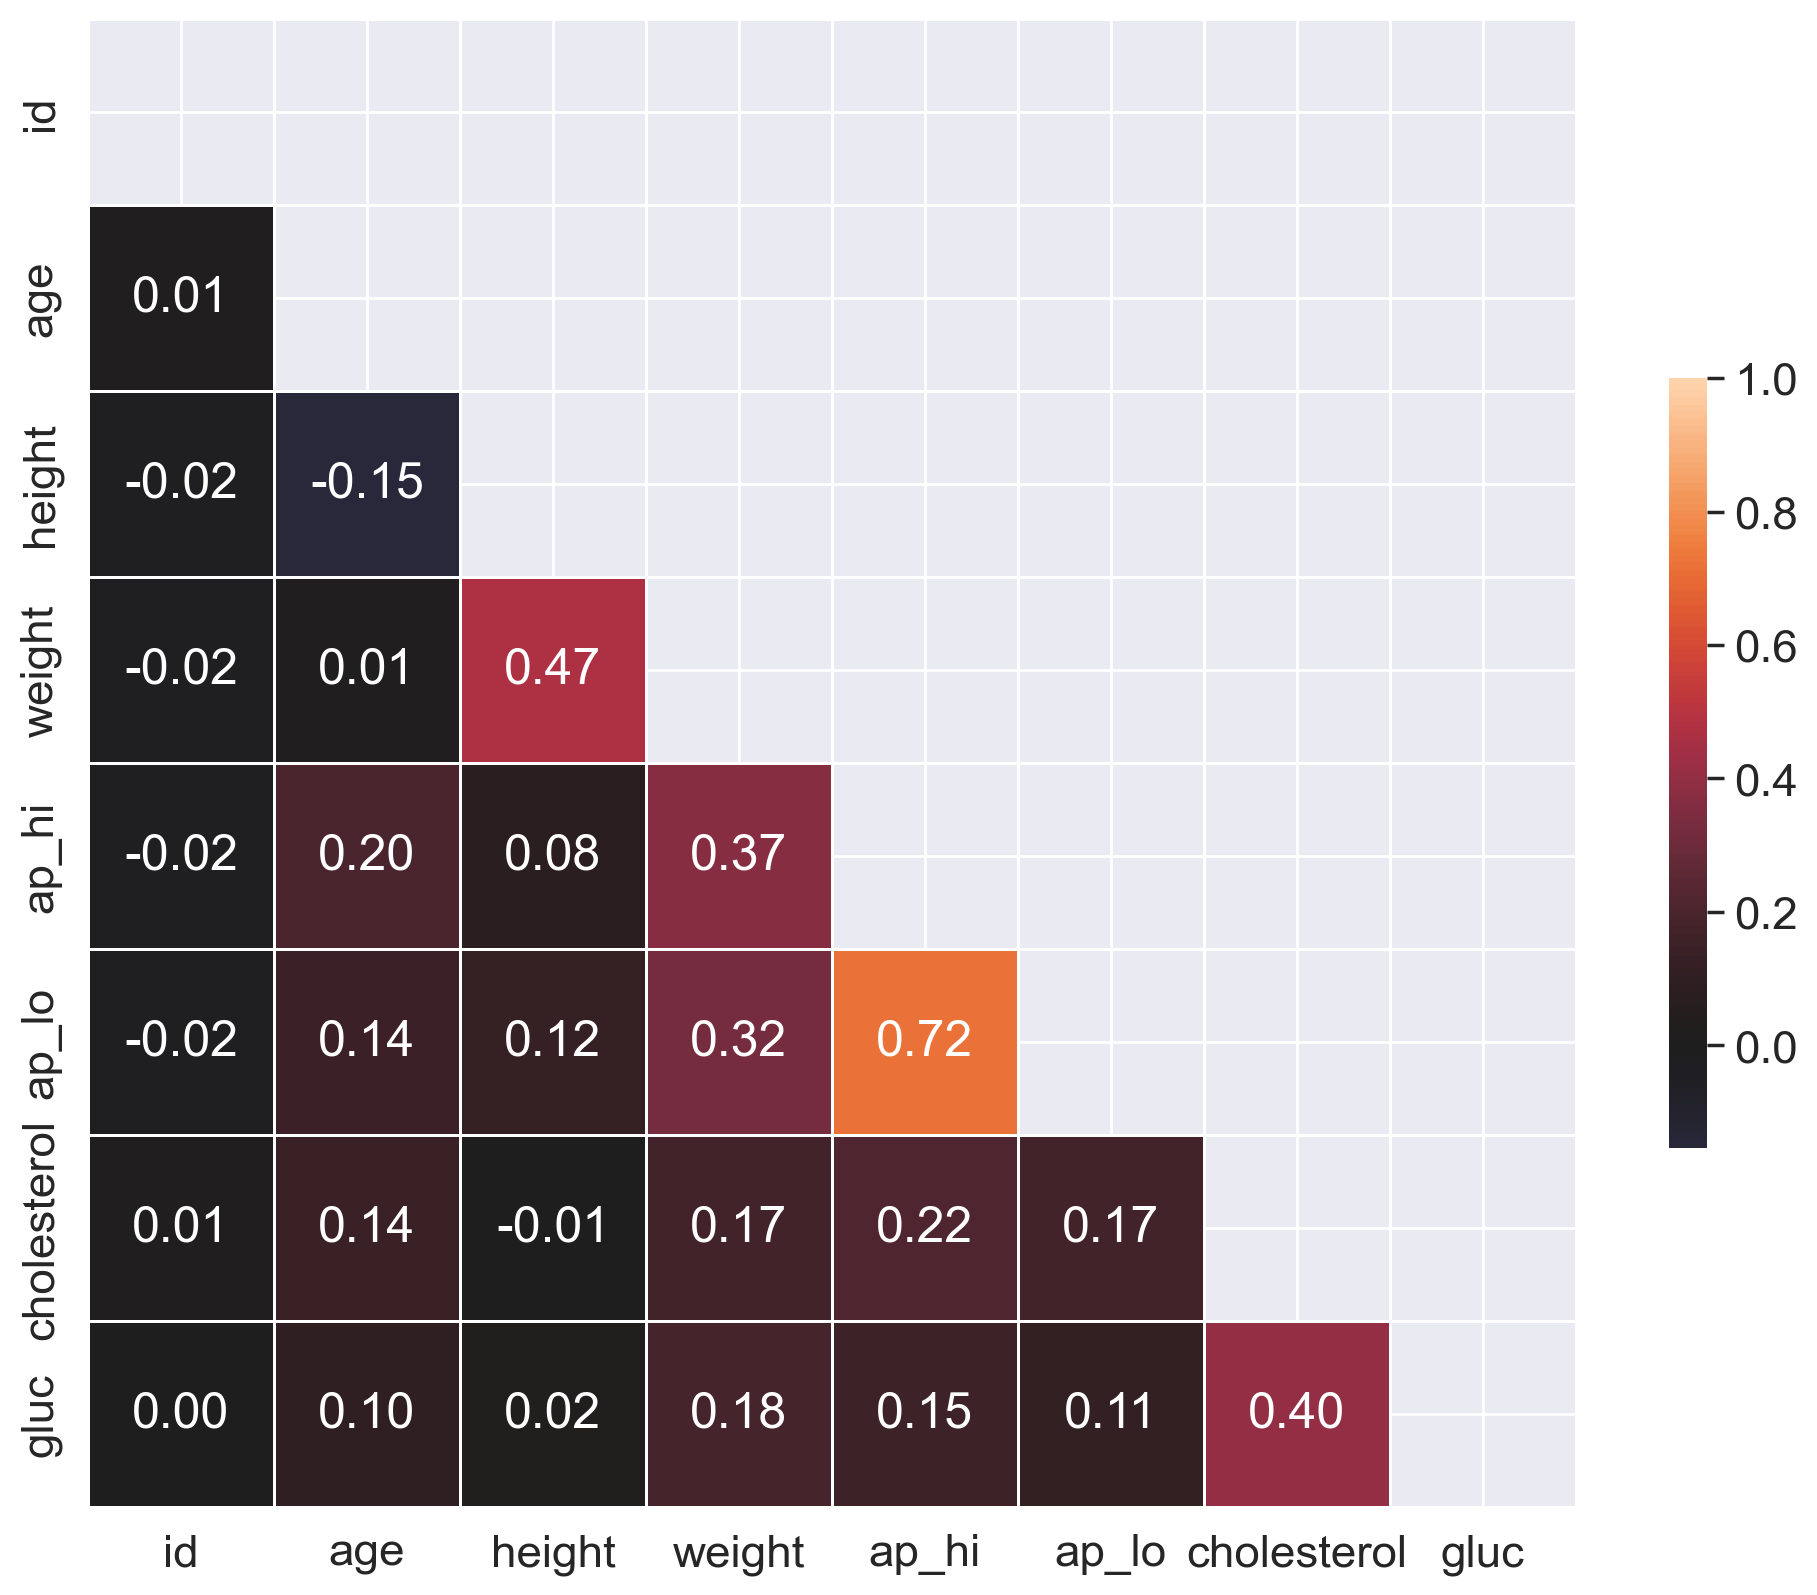

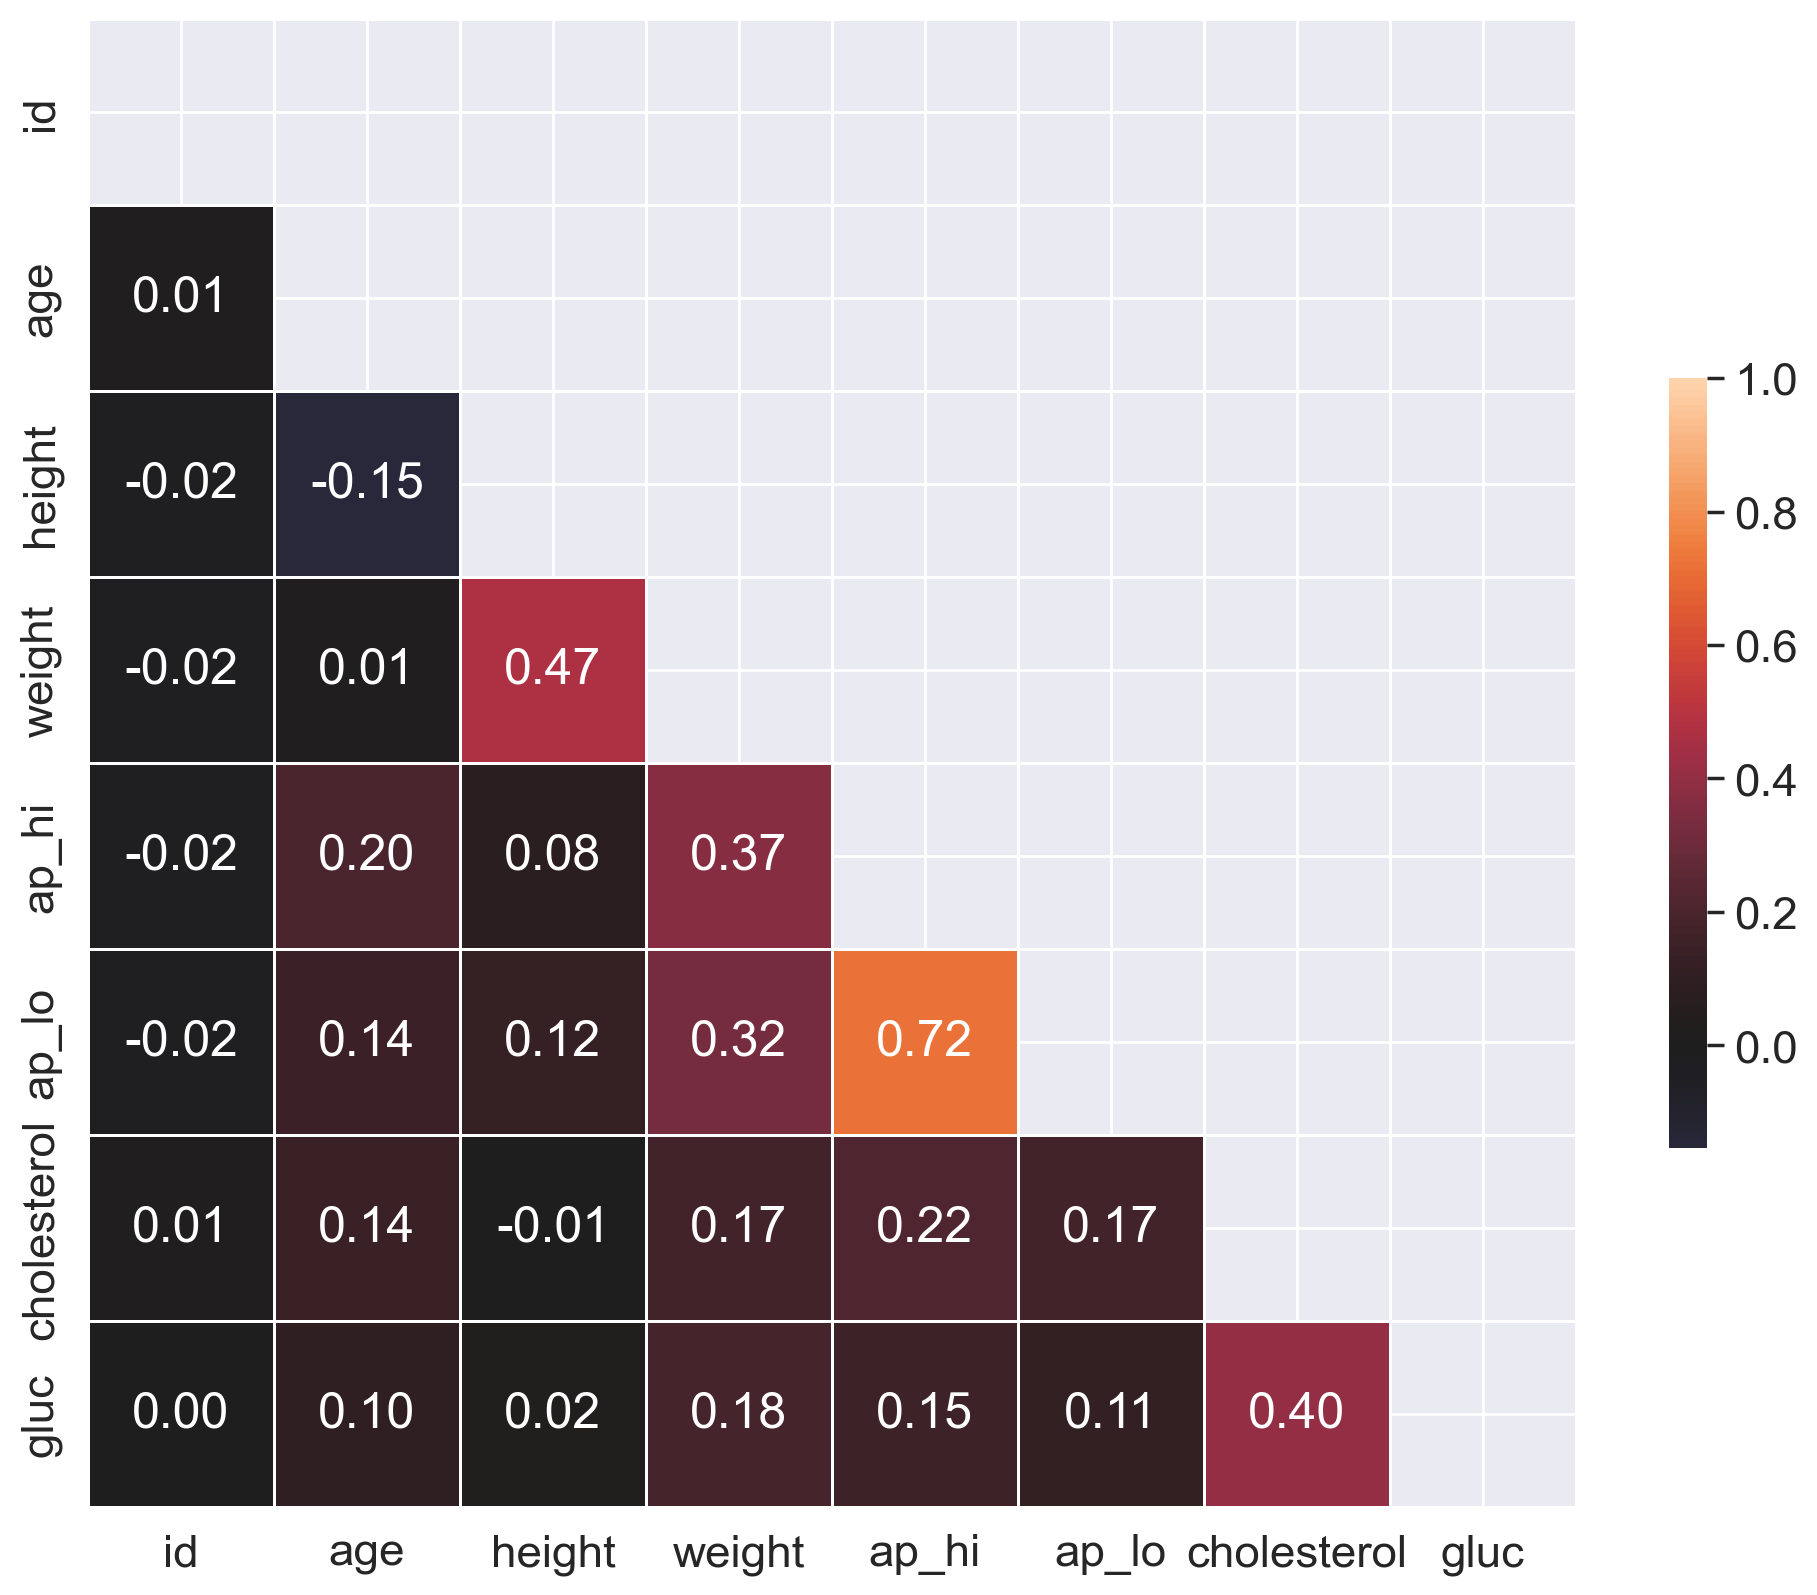

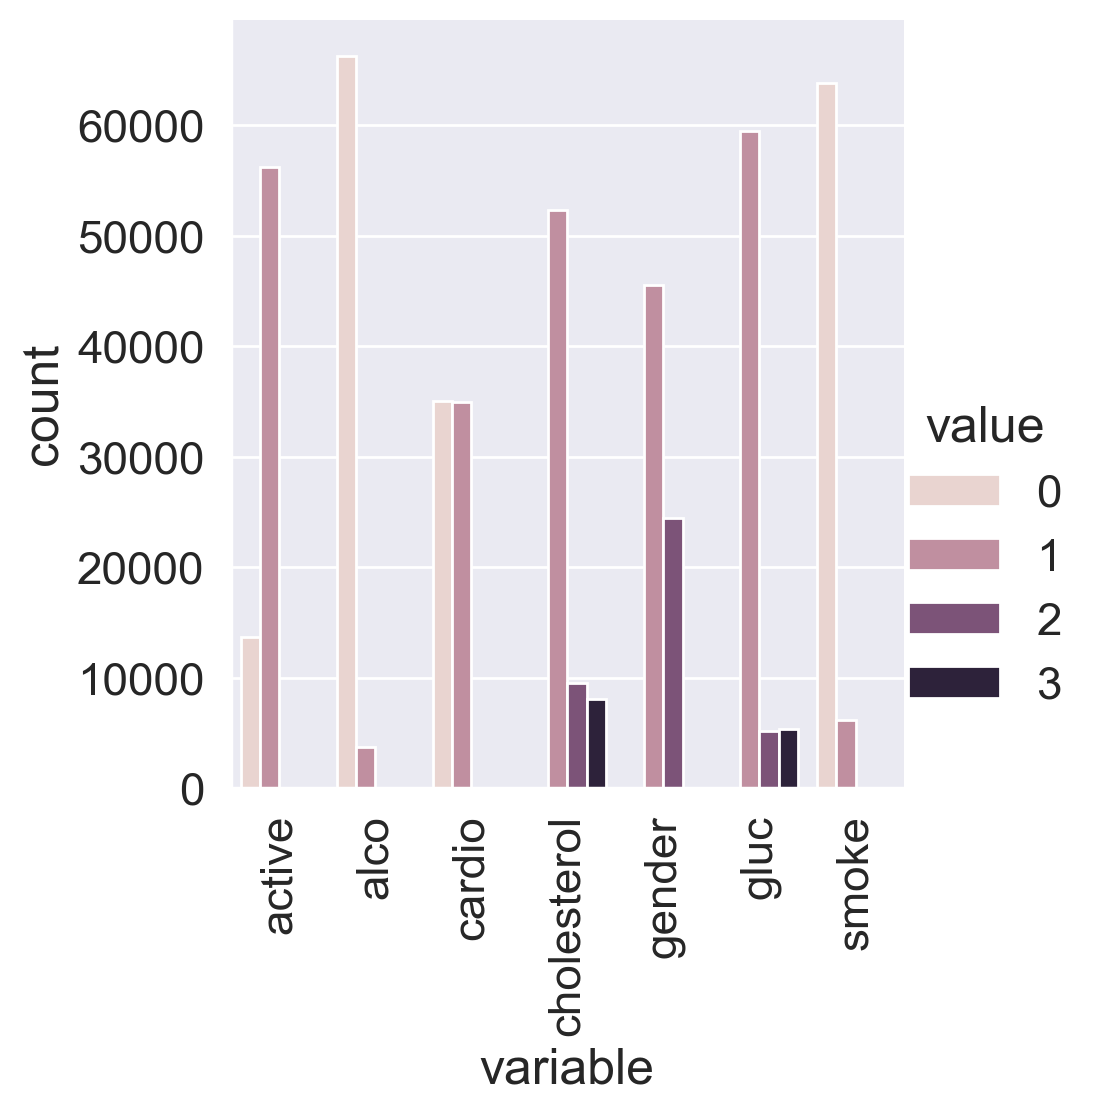

<Figure size 1095.25x500 with 0 Axes>

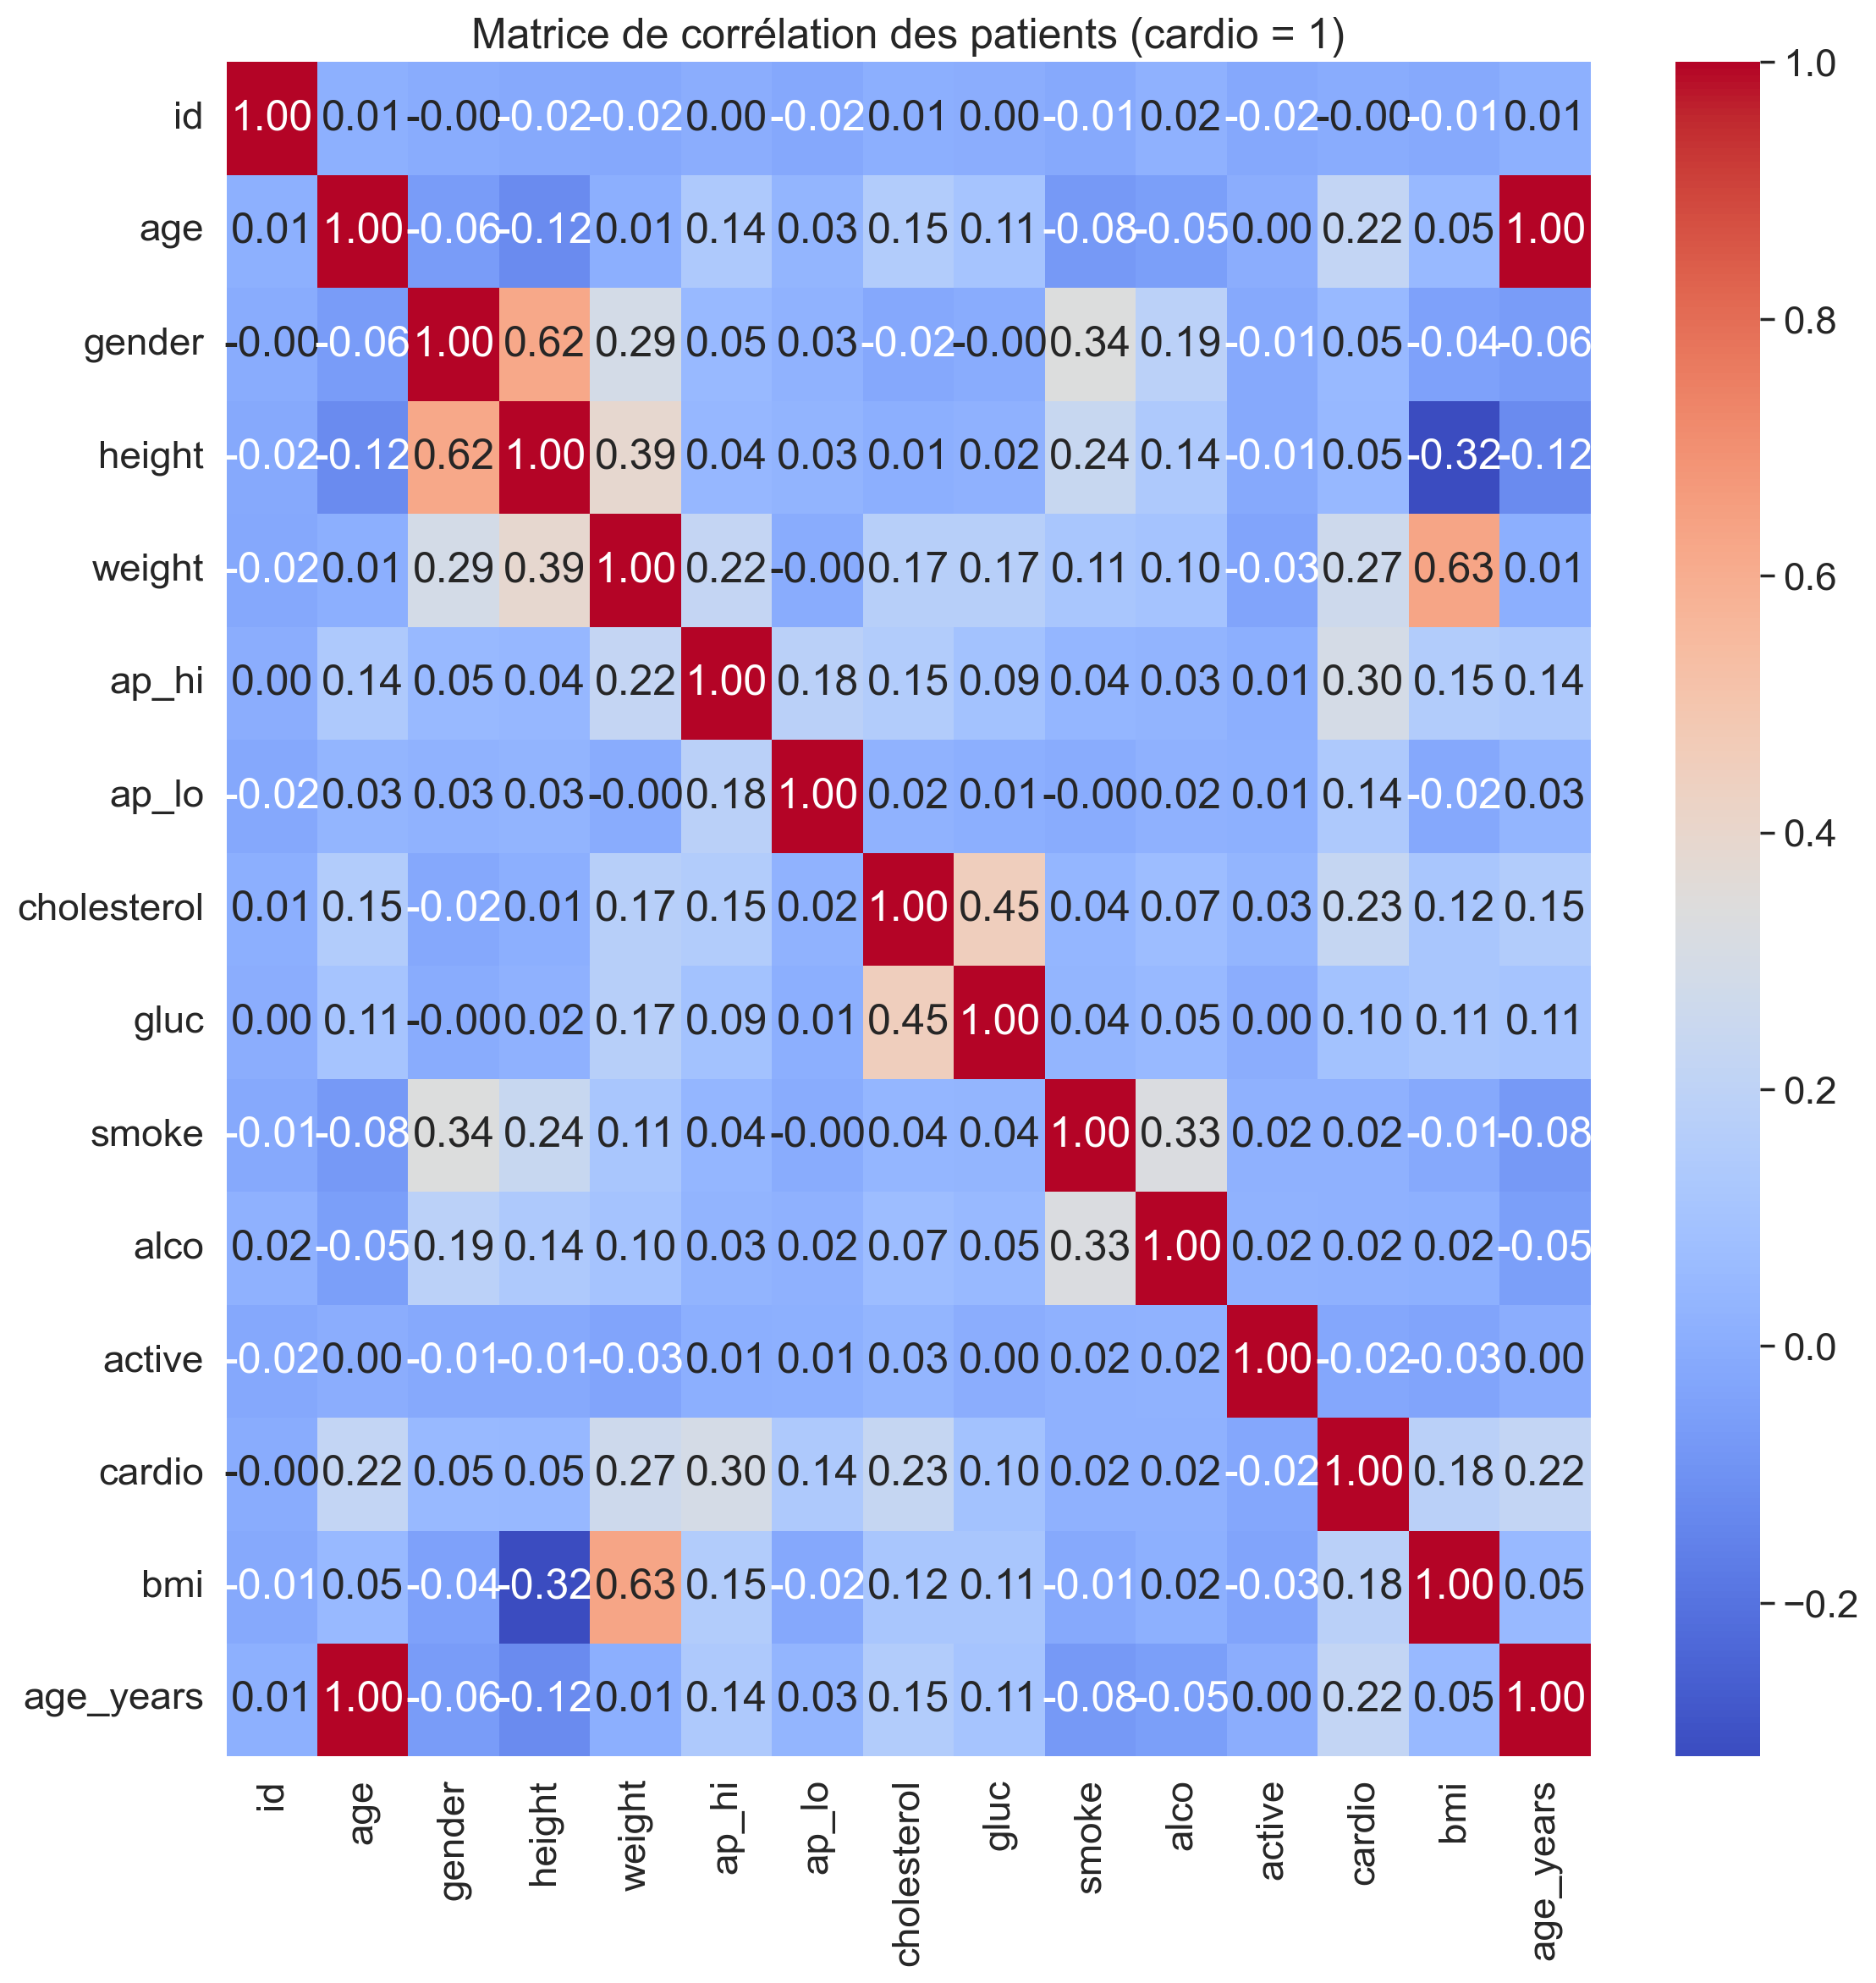

In [227]:
corr_matrix = patient_filters.corr()
plt.clf()
plt.figure(figsize=(13, 13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des patients (cardio = 1)")

plt.show()

## Question 2.1. Which pair of features has the strongest Pearson’s correlation with the gender feature?



# 2.2. Height distribution of men and women

In [ ]:
sns.violinplot(data=patient_filters, x='gender', y='height') 
plt.show()

# 2.3. Rank correlation

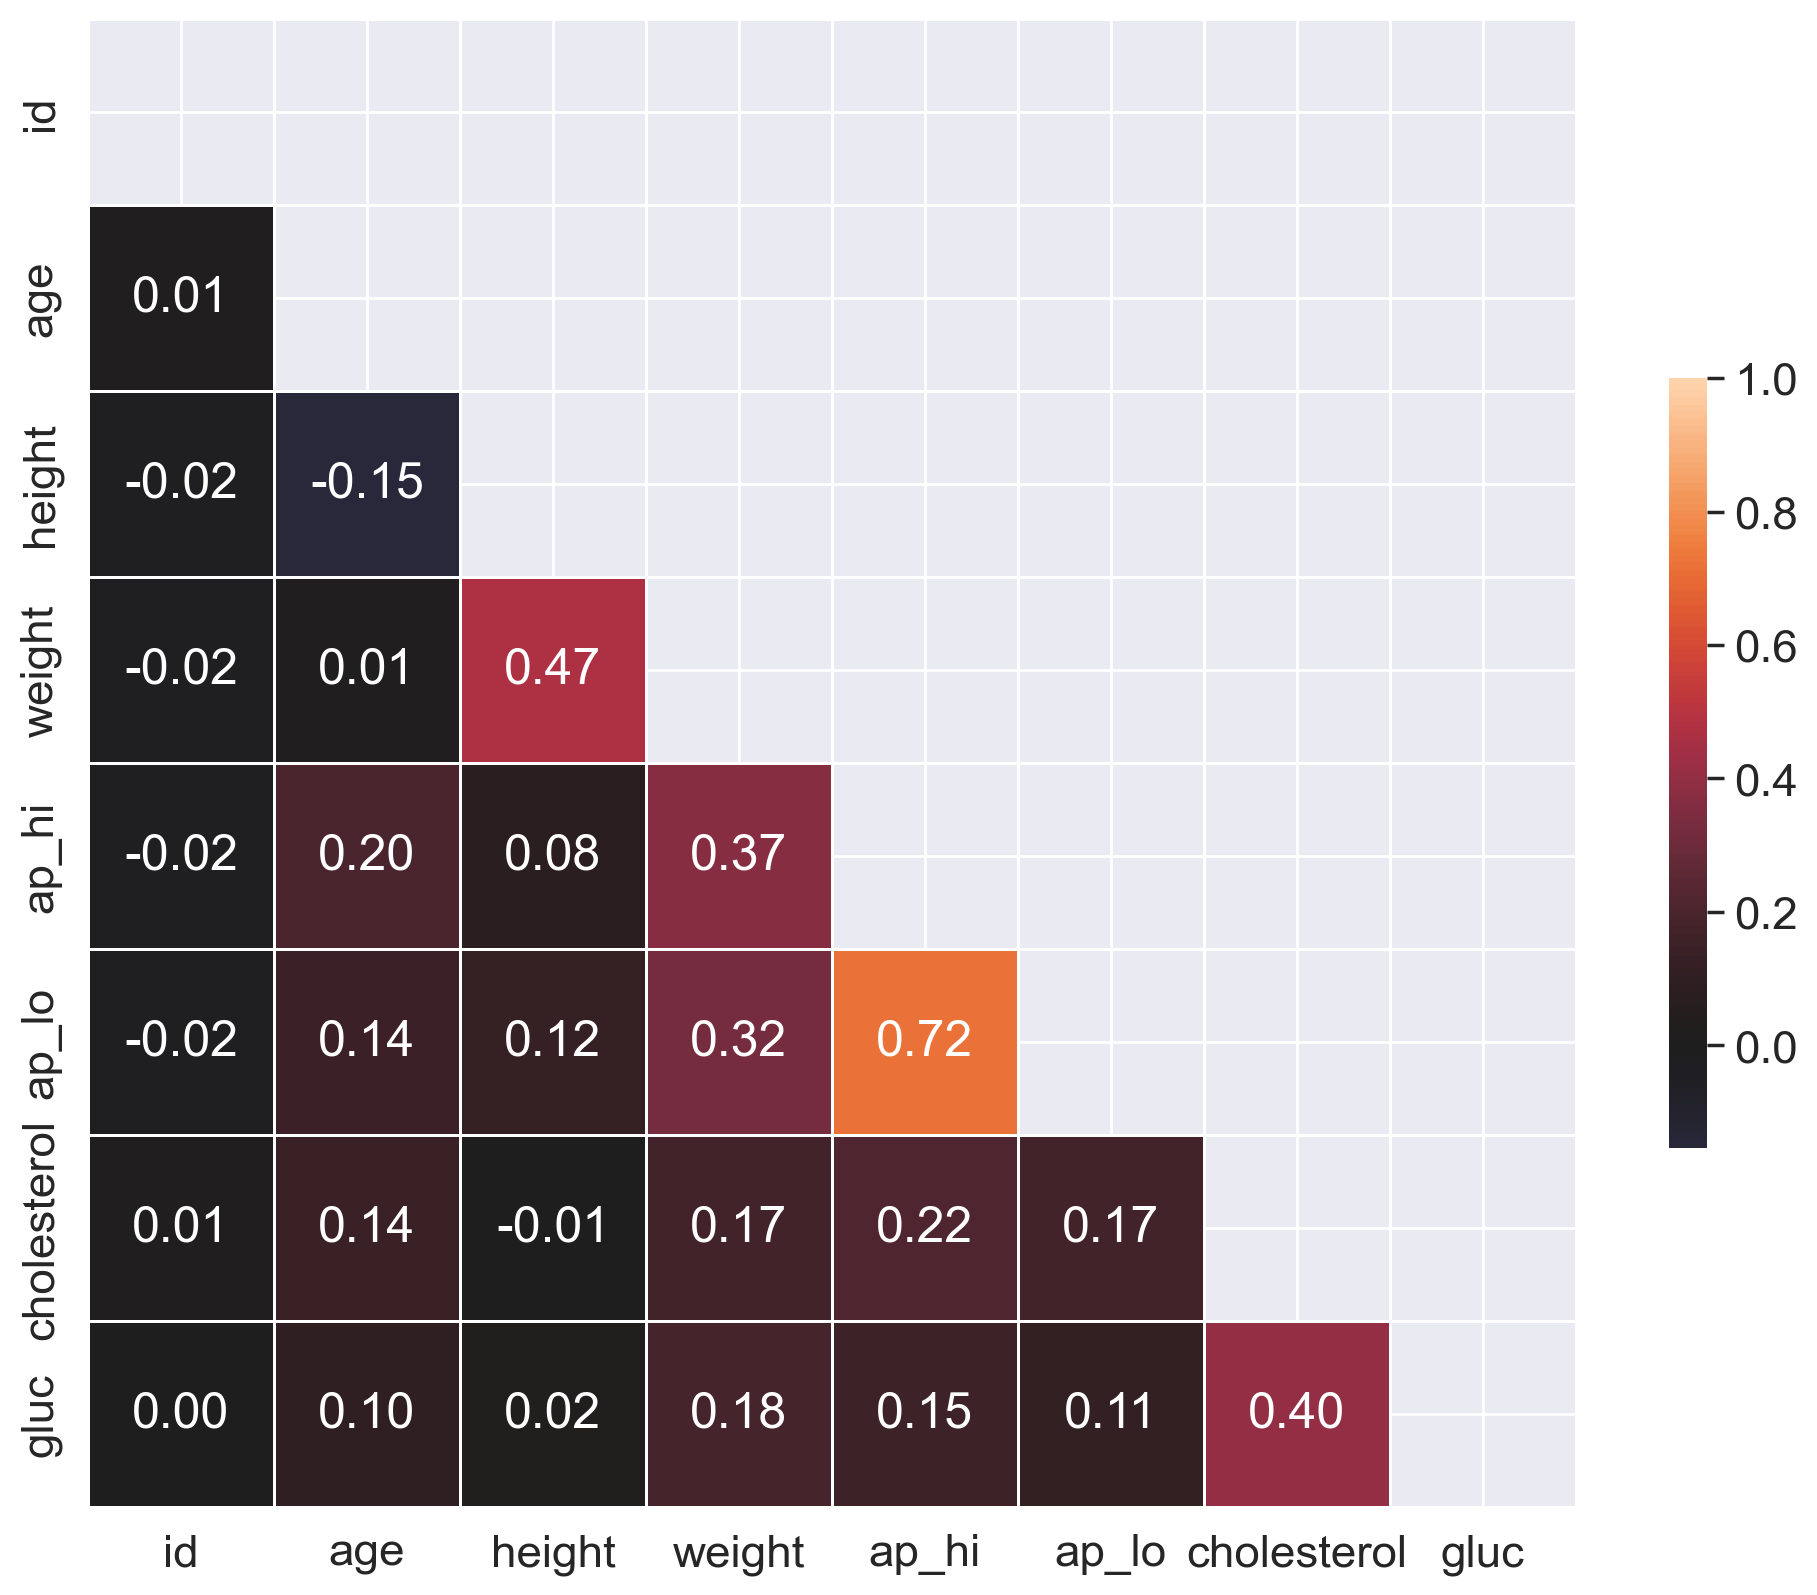

In [229]:
# Calculate the correlation matrix
corr = patient_filters[
    ["id", "age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc"]
].corr(method="spearman")

# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 10))

# Plot the heatmap using the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

plt.show()

## Question 2.2. (1 point). Which pair of features has the strongest Spearman rank correlation?
Ap_hi, Ap_lo

# 2.4. Age

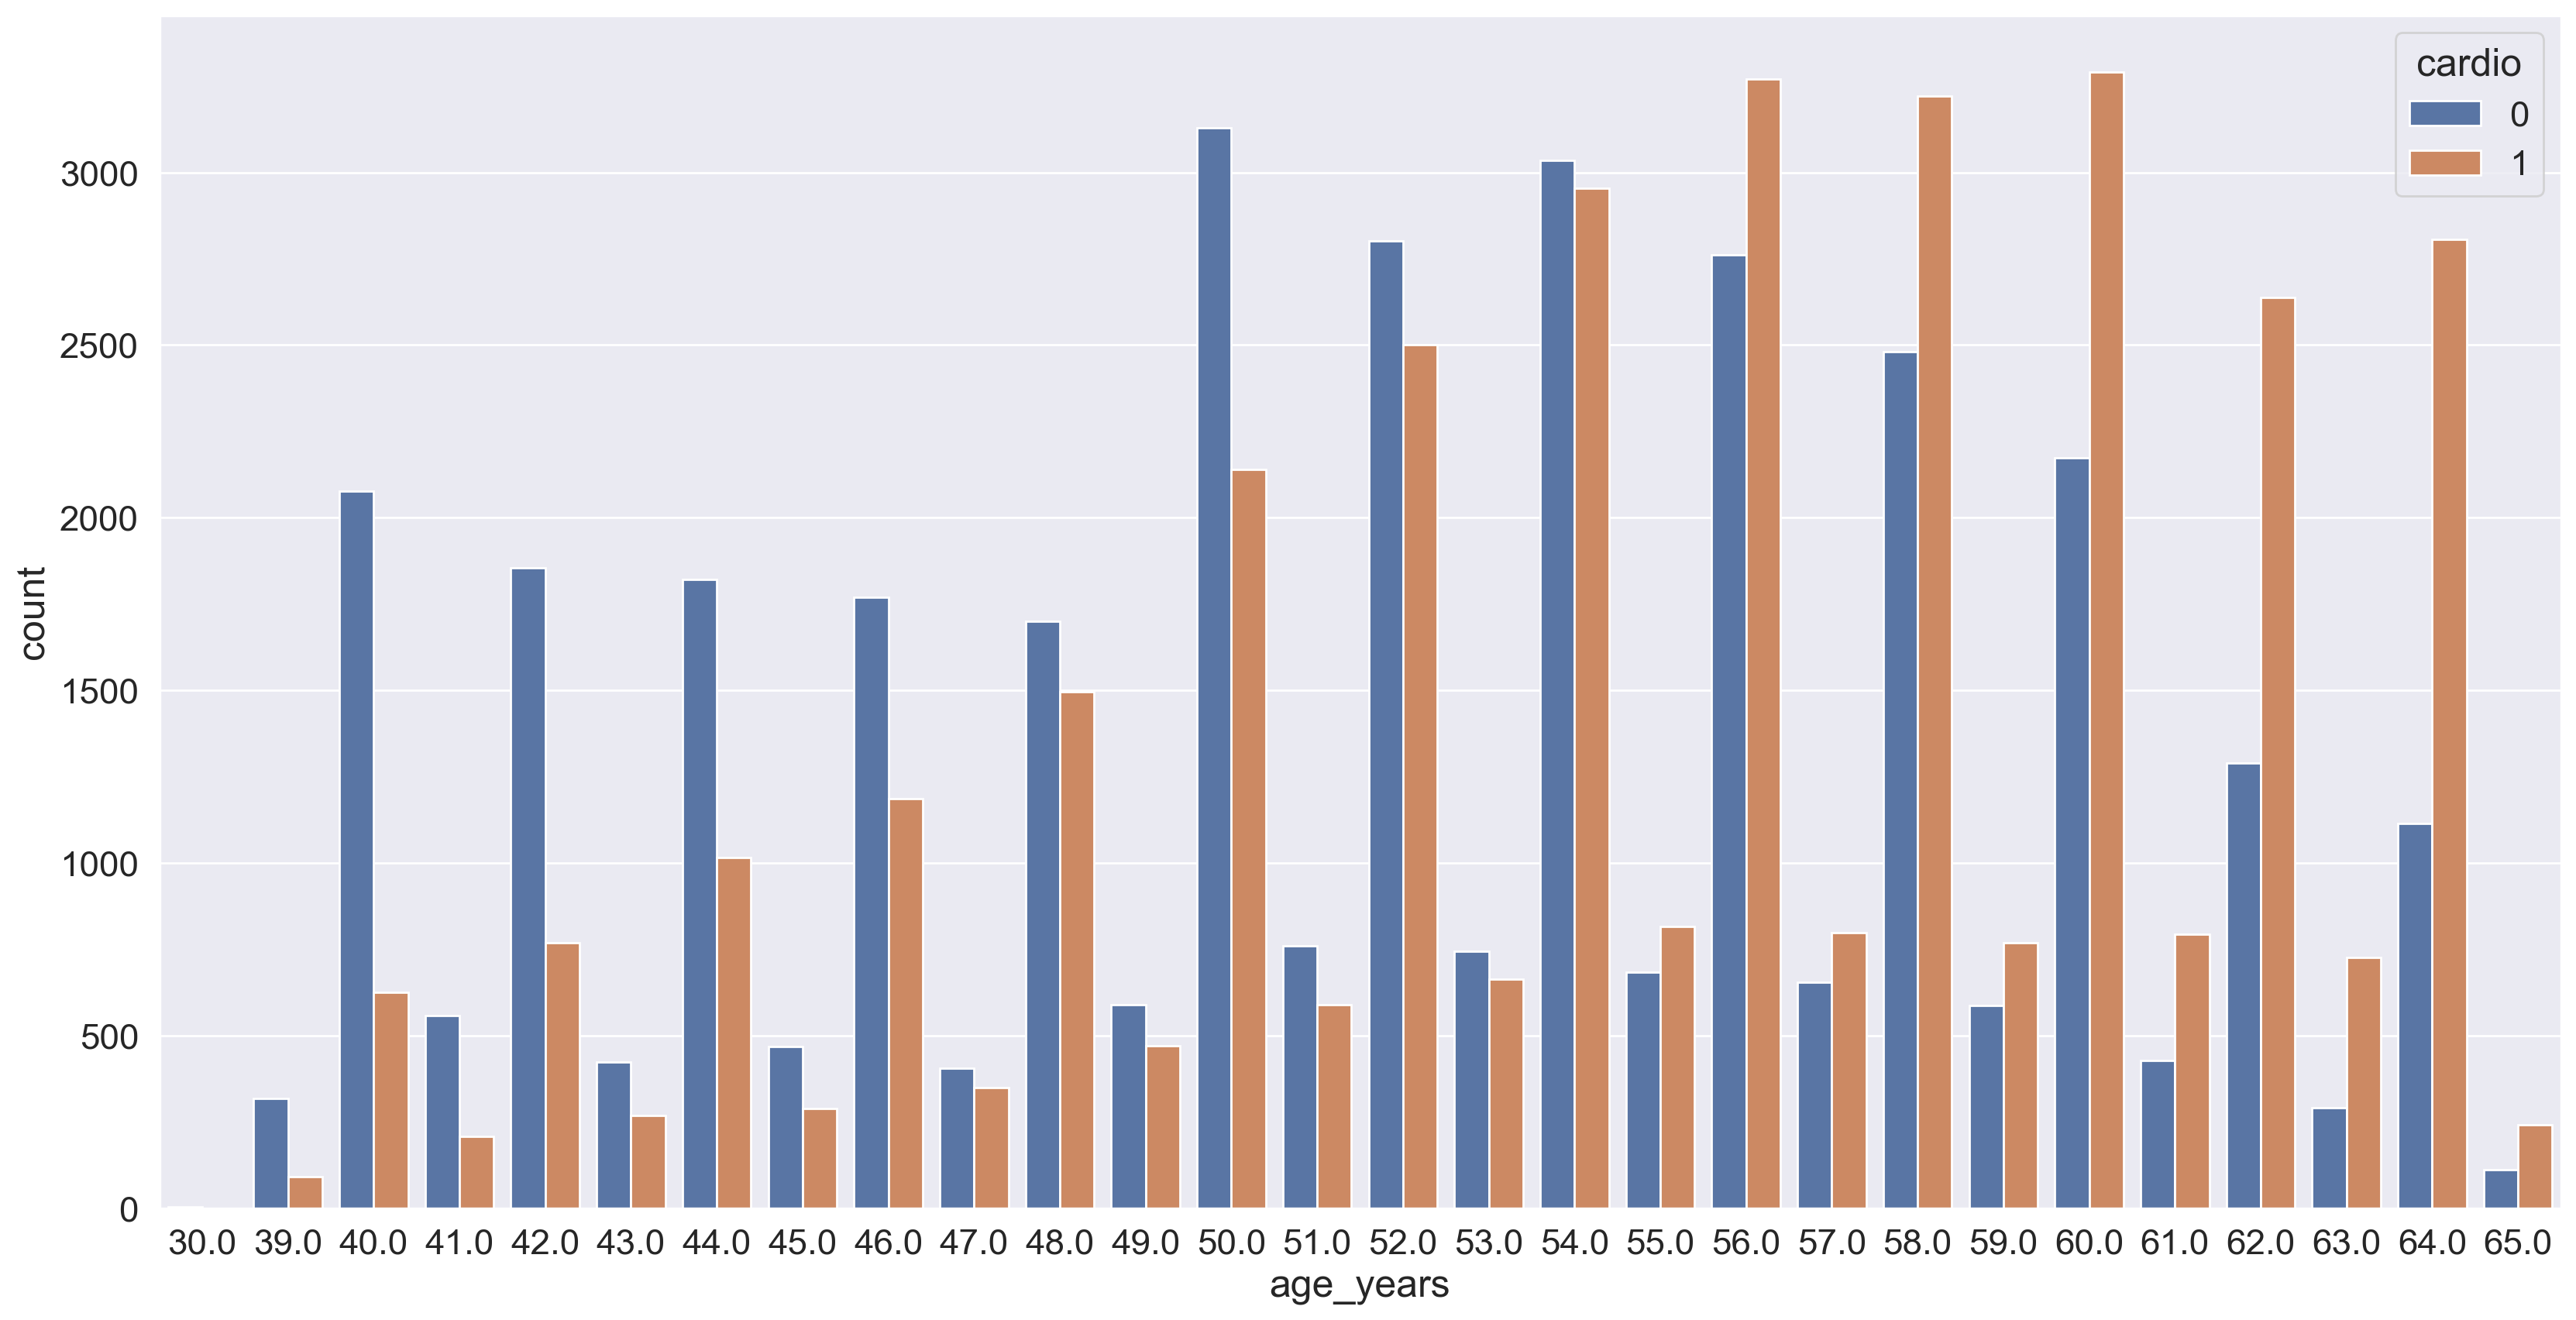

In [241]:
plt.figure(figsize=(20, 10))
sns.countplot(x="age_years", hue="cardio", data=df)
plt.show()